<a href="https://colab.research.google.com/github/RajakAmit/energy-efficiency-dataset/blob/main/energy_and_sql_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install and load necessary packages
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyr")

library(ggplot2)
library(dplyr)
library(tidyr)

# Assume 'data' is your dataframe loaded from the CSV
# data <- read.csv('path_to_your_csv_file')
# Load the dataset from GitHub
url <- "https://raw.githubusercontent.com/RajakAmit/energy-efficiency-dataset/main/energy-efficiency.csv"
data <- read.csv(url)

# Display the first few rows of the dataset
head(data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [3]:
# Example 1: Filtering Data Using dplyr
filtered_data <- data %>% filter(X2 > 500)
head(filtered_data)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [4]:
# Example 2: Summarizing Data Using dplyr
summary_data <- data %>% summarize(
  Average_Heating_Load = mean(Y1, na.rm = TRUE),
  Average_Cooling_Load = mean(Y2, na.rm = TRUE)
)
print(summary_data)

  Average_Heating_Load Average_Cooling_Load
1              22.3072             24.58776


In [5]:
# Example 3: Transforming Data Using mutate in dplyr
transformed_data <- data %>% mutate(Total_Area = X2 + X3)
head(transformed_data)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Total_Area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33,808.5
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33,808.5
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33,808.5
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33,808.5
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28,882.0
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38,882.0


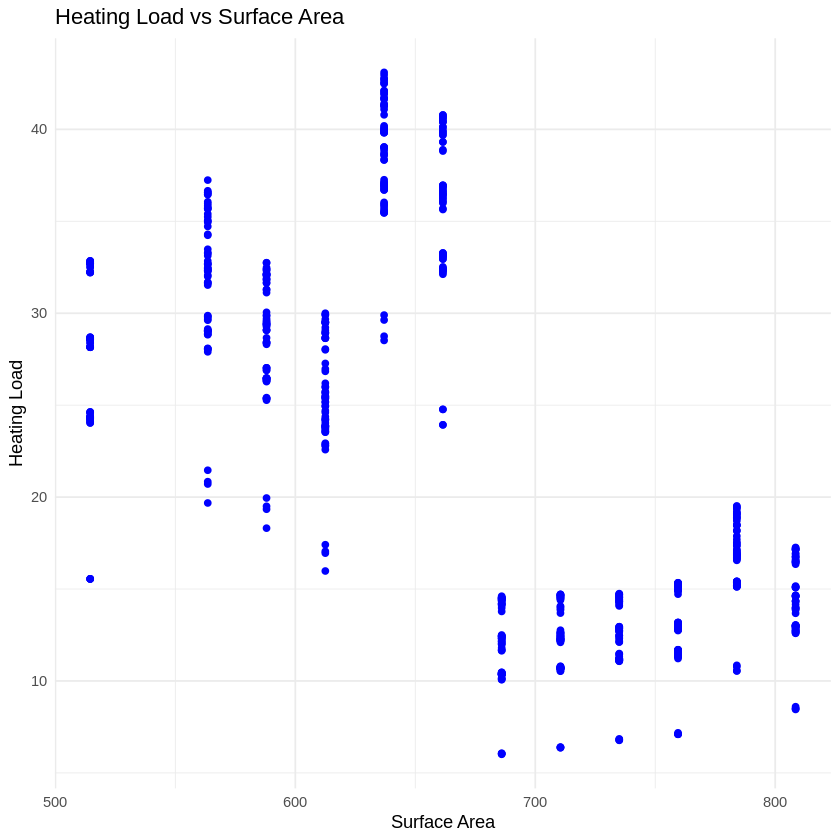

In [6]:
# Data Visualization in R

# Example 1: Scatter Plot Using ggplot2
ggplot(data, aes(x = X2, y = Y1)) +
  geom_point(color = 'blue') +
  labs(title = "Heating Load vs Surface Area", x = "Surface Area", y = "Heating Load") +
  theme_minimal()

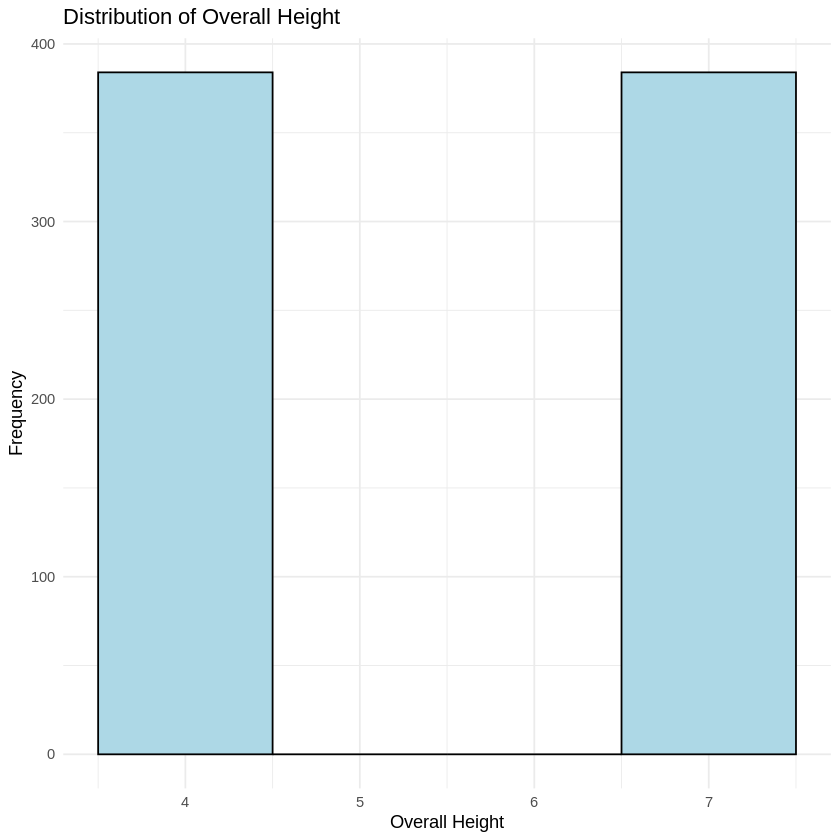

In [7]:
# Example 2: Histogram Using ggplot2
ggplot(data, aes(x = X5)) +
  geom_histogram(binwidth = 1, fill = 'lightblue', color = 'black') +
  labs(title = "Distribution of Overall Height", x = "Overall Height", y = "Frequency") +
  theme_minimal()

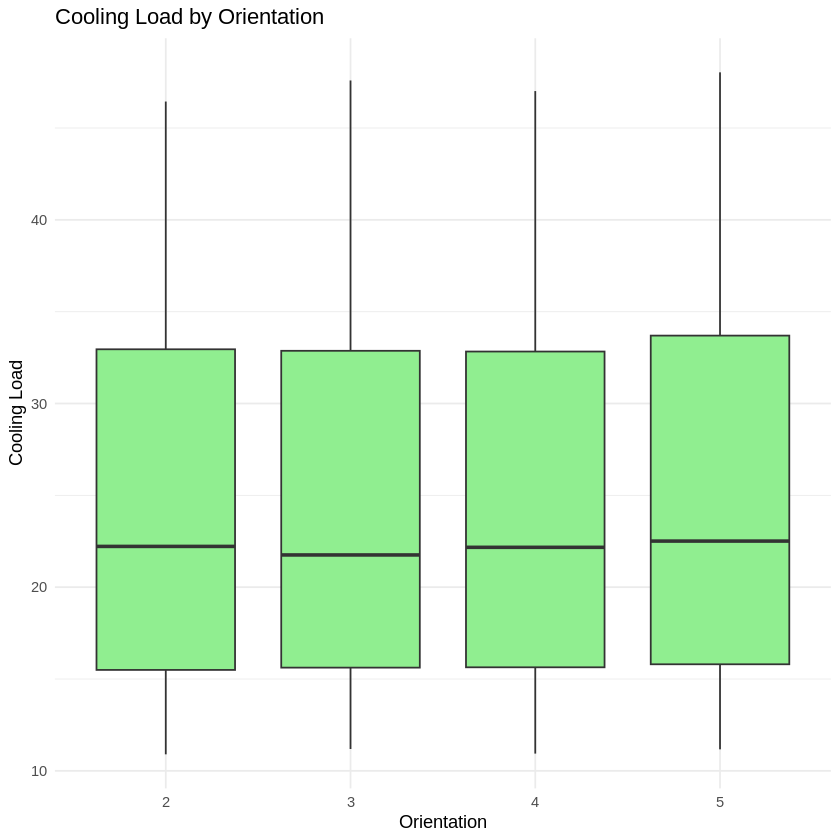

In [8]:
# Example 3: Boxplot Using ggplot2
ggplot(data, aes(x = factor(X6), y = Y2)) +
  geom_boxplot(fill = 'lightgreen') +
  labs(title = "Cooling Load by Orientation", x = "Orientation", y = "Cooling Load") +
  theme_minimal()

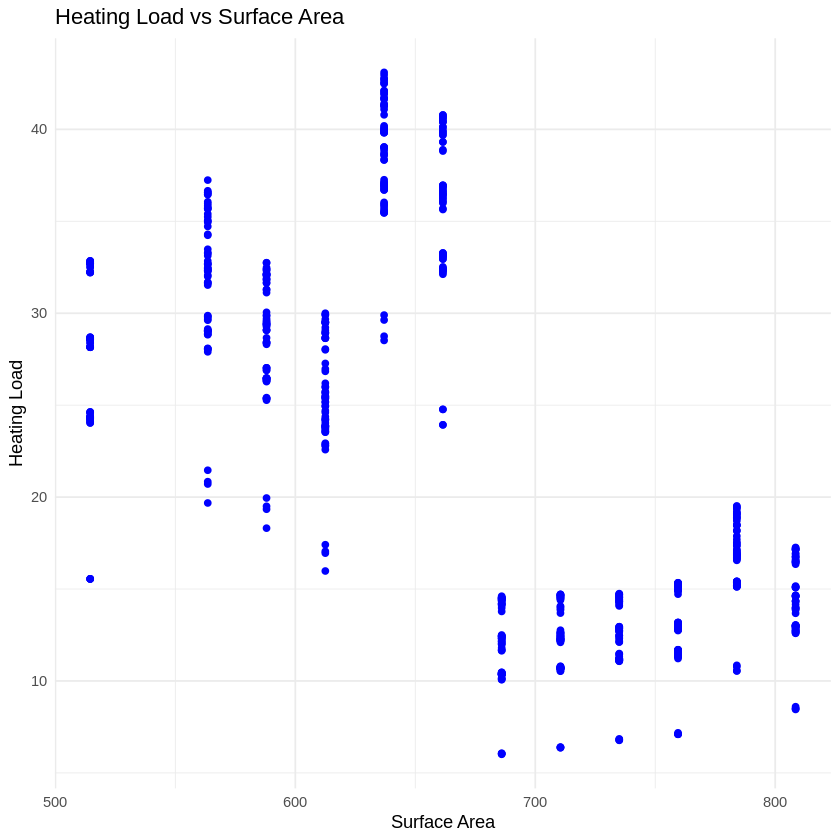

In [9]:
# Scatter plot
ggplot(data, aes(x = X2, y = Y1)) +
  geom_point(color = 'blue') +
  labs(title = "Heating Load vs Surface Area", x = "Surface Area", y = "Heating Load") +
  theme_minimal()


In [10]:
# Install the sqldf package
install.packages("sqldf")

# Load the sqldf package
library(sqldf)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



In [15]:
# Select all columns from the dataset
result <- sqldf("SELECT * FROM data")
print(head(result))




    X1    X2    X3     X4 X5 X6 X7 X8    Y1    Y2
1 0.98 514.5 294.0 110.25  7  2  0  0 15.55 21.33
2 0.98 514.5 294.0 110.25  7  3  0  0 15.55 21.33
3 0.98 514.5 294.0 110.25  7  4  0  0 15.55 21.33
4 0.98 514.5 294.0 110.25  7  5  0  0 15.55 21.33
5 0.90 563.5 318.5 122.50  7  2  0  0 20.84 28.28
6 0.90 563.5 318.5 122.50  7  3  0  0 21.46 25.38


In [16]:


# Select with a condition
result <- sqldf("SELECT * FROM data WHERE x2 > 20")
print(head(result))

    X1    X2    X3     X4 X5 X6 X7 X8    Y1    Y2
1 0.98 514.5 294.0 110.25  7  2  0  0 15.55 21.33
2 0.98 514.5 294.0 110.25  7  3  0  0 15.55 21.33
3 0.98 514.5 294.0 110.25  7  4  0  0 15.55 21.33
4 0.98 514.5 294.0 110.25  7  5  0  0 15.55 21.33
5 0.90 563.5 318.5 122.50  7  2  0  0 20.84 28.28
6 0.90 563.5 318.5 122.50  7  3  0  0 21.46 25.38


In [18]:
# Insert a new record into the dataset
sqldf("INSERT INTO data (x1, x2, x3, x4, x5, x6, x7, x8, y1, y2)
       VALUES (21.5, 4, 120.1, 97, 3.7, 2.5, 19.9, 1, 1, 4)")

# Display the updated dataset
result <- sqldf("SELECT * FROM data")
print(tail(result))


Warning message in result_fetch(res@ptr, n = n):
“SQL statements must be issued with dbExecute() or dbSendStatement() instead of dbGetQuery() or dbSendQuery().”


<0 x 0 matrix>

      X1    X2    X3    X4  X5 X6  X7 X8    Y1    Y2
763 0.64 784.0 343.0 220.5 3.5  4 0.4  5 18.16 20.71
764 0.64 784.0 343.0 220.5 3.5  5 0.4  5 17.88 21.40
765 0.62 808.5 367.5 220.5 3.5  2 0.4  5 16.54 16.88
766 0.62 808.5 367.5 220.5 3.5  3 0.4  5 16.44 17.11
767 0.62 808.5 367.5 220.5 3.5  4 0.4  5 16.48 16.61
768 0.62 808.5 367.5 220.5 3.5  5 0.4  5 16.64 16.03
